# Check the unique Stochiometries in QM9

In [3]:
import os, glob, sys
import numpy as np

path = "../../../datasets/QM9/xyz/"
xyz_files = glob.glob(os.path.join(path, "*.xyz"))
print(f"{len(xyz_files)} files from {path}")

133885 files from ../../../datasets/QM9/xyz/


In [4]:
def get_stoech(file): 
    content = open(file).readlines()
    nr_atoms = int(content[0])
    symbols = sorted([l.split("\t")[0] for l in content[2:nr_atoms+2]])
    symbols, counts = np.unique_counts(symbols)
    sym_str = ""
    for symbol, count in zip(symbols, counts): 
        if count > 1: 
            sym_str += f"{symbol}{count}"
        else: 
            sym_str += symbol
    return nr_atoms, sym_str
        
def get_unique_stoechs(files): 
    stoechs = {}
    for c, file in enumerate(files): 
        nr_atoms, atoms = get_stoech(file)
        try: 
            stoechs[nr_atoms][atoms] += 1
        except KeyError: 
            try: 
                stoechs[nr_atoms][atoms] = 1
            except KeyError: 
                stoechs[nr_atoms] = {atoms : 1}
        # if c == 1000: 
        #     break
    return stoechs
us = get_unique_stoechs(xyz_files)

In [5]:
nr_atoms = {}
for file in xyz_files: 
    nr_ato = int(open(file).readlines()[0])
    try: 
        nr_atoms[nr_ato] += 1
    except KeyError: 
        nr_atoms[nr_ato] = 1
nr_atoms_sorted = sorted(nr_atoms.items(), key=lambda x: x[0])

In [6]:
# get isomers

max_isomers = []
for nr_atoms, isomers in us.items():
    max_isomer = max(isomers, key=isomers.get)
    max_val = isomers[max_isomer]
    max_isomers.append((nr_atoms, max_isomer, max_val))
max_isomers.sort(key=lambda x: x[0])
max_isomers

[(3, 'H2O', 1),
 (4, 'H3N', 1),
 (5, 'N4O', 1),
 (6, 'CHN3O', 2),
 (7, 'C2H2N2O', 4),
 (8, 'C3H3NO', 6),
 (9, 'C4H2N2O', 16),
 (10, 'C3H2N2O3', 32),
 (11, 'C5H2N2O2', 84),
 (12, 'C4H3N3O2', 200),
 (13, 'C5H4N2O2', 509),
 (14, 'C6H5NO2', 916),
 (15, 'C5H6N2O2', 1956),
 (16, 'C6H7NO2', 3929),
 (17, 'C6H8N2O', 3593),
 (18, 'C6H9NO2', 5794),
 (19, 'C7H10O2', 6095),
 (20, 'C7H11NO', 5859),
 (21, 'C8H12O', 4918),
 (22, 'C7H13NO', 2215),
 (23, 'C8H14O', 3154),
 (24, 'C7H15NO', 392),
 (25, 'C8H16O', 966),
 (26, 'C8H17N', 41),
 (27, 'C9H18', 185),
 (29, 'C9H20', 35)]

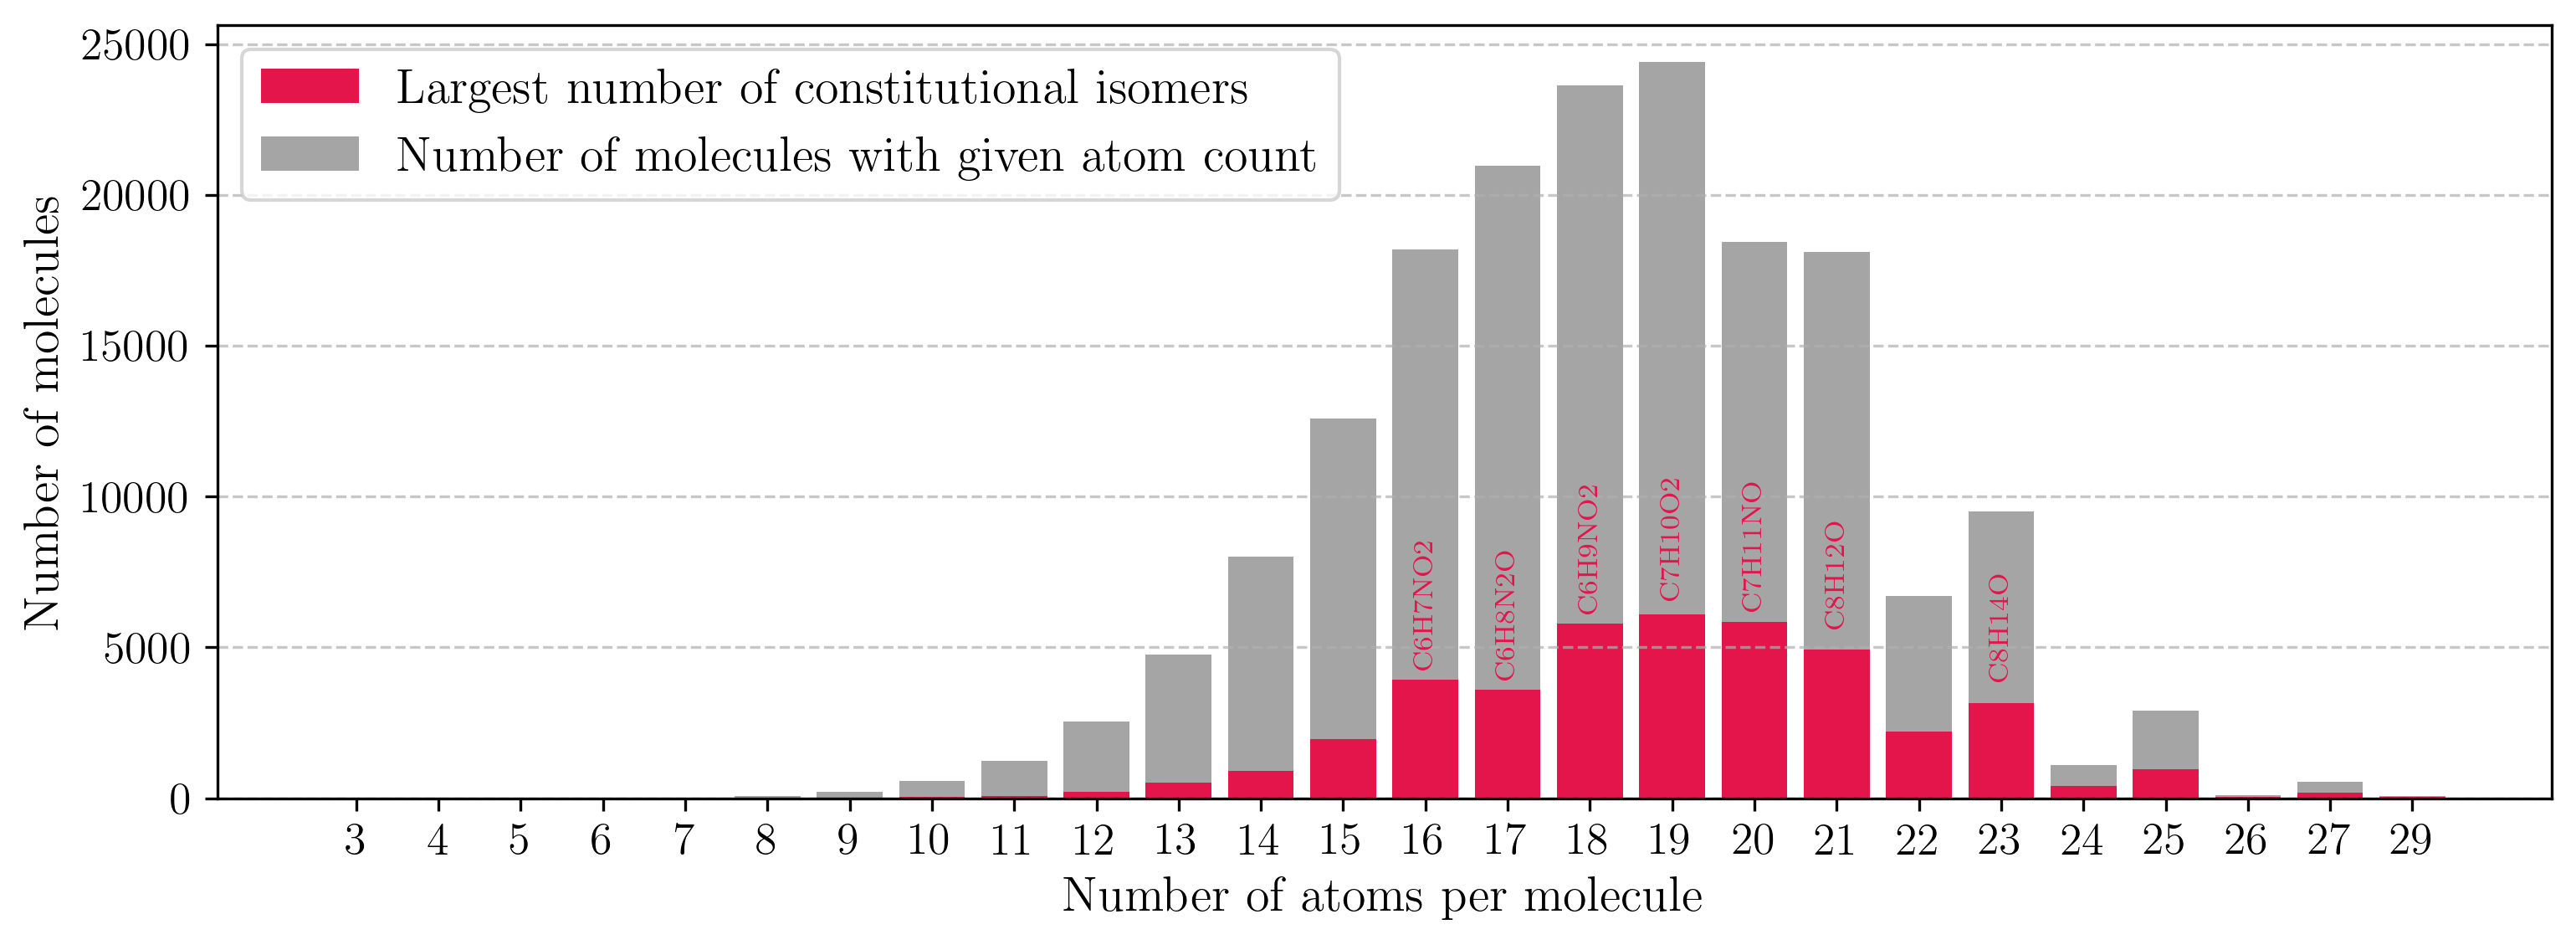

In [12]:
import sys
sys.path.append("../../scripts/")
from plt_config import use_latex, TU_GREY, TU_RED
import matplotlib.pyplot as plt
use_latex()

combined_stats = [(*max_isomer, nr_el[1]) for max_isomer, nr_el in zip(max_isomers, nr_atoms_sorted)]
combined_stats.sort(key=lambda x: x[0])
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(
    [str(x[0]) for x in combined_stats], 
    [x[2] for x in combined_stats], 
    label="Largest number of constitutional isomers"
)
ax.bar(
    [str(x[0]) for x in combined_stats], 
    [x[3] for x in combined_stats], 
    bottom=[x[2] for x in combined_stats], 
    label="Number of molecules with given atom count"
)

# Add text for largest constitutional isomers if count is over 2000
for x in combined_stats:
    str_ = r"{"+str(x[0])+r"}"
    if x[2] > 2500:
        ax.text(
            str(x[0]), 
            x[2] + 2500, 
            x[1], 
            ha='center', 
            va='center',
            rotation=90, 
            fontsize=8, 
            color=TU_RED
        )

ax.legend(loc="upper left", fontsize=14)
ax.set_ylabel("Number of molecules", fontsize=14)
ax.set_xlabel("Number of atoms per molecule", fontsize=14)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(axis='x')
plt.savefig("../../fig/qm9_general/qm9_overview_stacked_bar.pdf", bbox_inches="tight")

Ok C5H4N2O2 looks like a reasonable start ~ 509 samples

In [8]:
#xyz_c5h3n2o2
path = "../../datasets/QM9/xyz_c5h4n2o2/"
xyz_c5h3n2o2 = glob.glob(os.path.join(path, "*.xyz"))
print(len(xyz_c5h3n2o2))

0


In [9]:
# benchmark one sim
scripts_path = "../../scripts"
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from to_cache import density_fock_overlap

ModuleNotFoundError: No module named 'to_cache'

In [ ]:
results = []
for c, file in enumerate(xyz_c5h3n2o2): 
    mol_name = os.path.basename(file).split(".")[0]
    print(f"{mol_name} ({c+1}/{len(xyz_c5h3n2o2)})")
    ret = density_fock_overlap(filepath = file,
                         filename = mol_name,
                         method = "dft",
                         basis = "sto-3g",
                         functional = "b3lypg",
                         guess = "minao",
                         backend = "pyscf",
                         cache = "../../datasets/QM9/out/c5h4n2o2-sto-3g-b3lyp")
    if any([x is None for x in ret]): 
        print("Not all data available!")
    else: 
        print(f"Got all data for {mol_name}")
    print("\n---")
    results.append(ret)

dsgdb9nsd_066055 (1/509)
Got all data for dsgdb9nsd_066055

---
dsgdb9nsd_130874 (2/509)
Got all data for dsgdb9nsd_130874

---
dsgdb9nsd_131580 (3/509)
Got all data for dsgdb9nsd_131580

---
dsgdb9nsd_125392 (4/509)
Got all data for dsgdb9nsd_125392

---
dsgdb9nsd_043912 (5/509)
Got all data for dsgdb9nsd_043912

---
dsgdb9nsd_025189 (6/509)
Got all data for dsgdb9nsd_025189

---
dsgdb9nsd_025163 (7/509)
Got all data for dsgdb9nsd_025163

---
dsgdb9nsd_080788 (8/509)
Got all data for dsgdb9nsd_080788

---
dsgdb9nsd_025207 (9/509)
Got all data for dsgdb9nsd_025207

---
dsgdb9nsd_025094 (10/509)
Got all data for dsgdb9nsd_025094

---
dsgdb9nsd_130694 (11/509)
Got all data for dsgdb9nsd_130694

---
dsgdb9nsd_062369 (12/509)
Got all data for dsgdb9nsd_062369

---
dsgdb9nsd_048222 (13/509)
Got all data for dsgdb9nsd_048222

---
dsgdb9nsd_130783 (14/509)
Got all data for dsgdb9nsd_130783

---
dsgdb9nsd_056727 (15/509)
Got all data for dsgdb9nsd_056727

---
dsgdb9nsd_081728 (16/509)
Got all 

(49, 49)


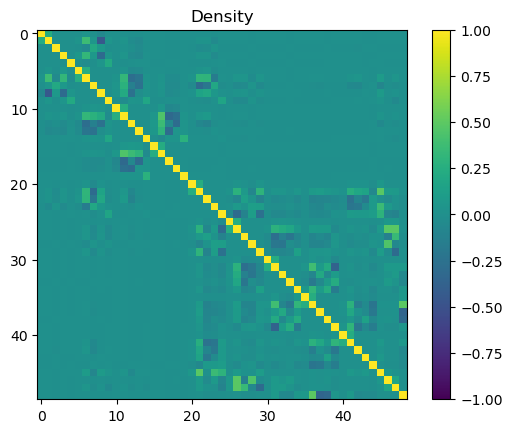

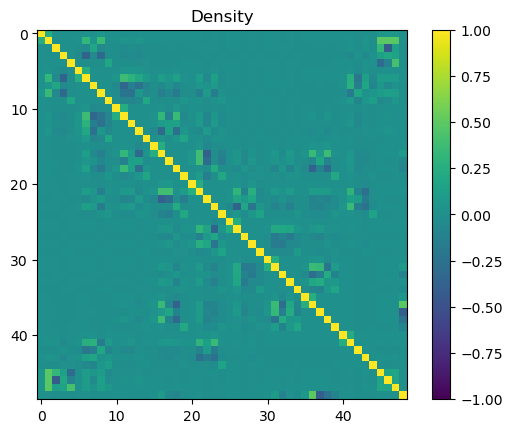

In [ ]:
import matplotlib.pyplot as plt

r1,r2 = np.random.randint(0, len(results), 2)
d1, d2 = results[r1][2].numpy, results[r2][2].numpy
print(d1.shape)
plt.imshow(d1, vmin=-1, vmax=1)
plt.colorbar()
plt.title("Density")
plt.show()
plt.imshow(d2, vmin=-1, vmax=1)
plt.colorbar()
plt.title("Density")
plt.show()
